In [ ]:

import pandas as pd
import numpy as np
from os import listdir
import tensorflow as tf
import cv2 
# from glob import glob
import os
import glob
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt


%matplotlib inline
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import load_model

# Displaying images from the test file.

A sample file name: 2.PNG
Shape information of two arbitrary images: (885, 733, 3) - this one is shown below, and (885, 733, 3)


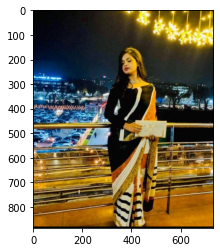

In [ ]:
dir_struct_Test = '/content/drive/MyDrive/Test_Model_Images/'
file_lst = listdir(dir_struct_Test)
print('A sample file name: {}'.format(file_lst[1]))

image = cv2.imread(dir_struct_Test+file_lst[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('Shape information of two arbitrary images: {} - this one is shown below, and {}'.format(image.shape, cv2.imread(dir_struct_Test+file_lst[1]).shape))
plt.imshow(image)

# Resizing the image to be able to utilize for further processing after loading into an array.

In [ ]:
array_images = glob.glob(dir_struct_Test + '*')
image_lst = [] # this list will hold all the images

for i in array_images: # read the image one by one
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA) 
    image_lst.append(image) # appending the read image to a list

# Converting the image list to numpy array

In [ ]:
test_images = np.array(image_lst)

In [ ]:
test_images

array([[[[ 23,  24,  44],
         [ 25,  27,  55],
         [ 21,  24,  48],
         ...,
         [  5,   5,  13],
         [  5,   4,  11],
         [  5,   4,  11]],

        [[ 29,  30,  64],
         [ 27,  30,  60],
         [ 24,  26,  53],
         ...,
         [  5,   5,  14],
         [  5,   5,  13],
         [  5,   5,  12]],

        [[ 32,  34,  72],
         [ 30,  32,  69],
         [ 24,  26,  55],
         ...,
         [  5,   6,  14],
         [  5,   6,  11],
         [  5,   6,  11]],

        ...,

        [[140, 114,  55],
         [ 92,  75,  53],
         [ 84,  75,  37],
         ...,
         [ 17,  11,  10],
         [ 23,  16,  12],
         [ 40,  29,  25]],

        [[158, 130,  67],
         [ 84,  70,  46],
         [150, 125,  38],
         ...,
         [ 43,  30,  17],
         [ 26,  18,  11],
         [ 20,  14,  13]],

        [[107,  92,  56],
         [126, 106,  37],
         [ 92,  71,  28],
         ...,
         [ 17,  11,  10],
        

# Normalizing the test_images so that the value is between 0 and 1

In [ ]:
test_images = test_images/255.0

In [ ]:
test_images

array([[[[0.09019608, 0.09411765, 0.17254902],
         [0.09803922, 0.10588235, 0.21568627],
         [0.08235294, 0.09411765, 0.18823529],
         ...,
         [0.01960784, 0.01960784, 0.05098039],
         [0.01960784, 0.01568627, 0.04313725],
         [0.01960784, 0.01568627, 0.04313725]],

        [[0.11372549, 0.11764706, 0.25098039],
         [0.10588235, 0.11764706, 0.23529412],
         [0.09411765, 0.10196078, 0.20784314],
         ...,
         [0.01960784, 0.01960784, 0.05490196],
         [0.01960784, 0.01960784, 0.05098039],
         [0.01960784, 0.01960784, 0.04705882]],

        [[0.1254902 , 0.13333333, 0.28235294],
         [0.11764706, 0.1254902 , 0.27058824],
         [0.09411765, 0.10196078, 0.21568627],
         ...,
         [0.01960784, 0.02352941, 0.05490196],
         [0.01960784, 0.02352941, 0.04313725],
         [0.01960784, 0.02352941, 0.04313725]],

        ...,

        [[0.54901961, 0.44705882, 0.21568627],
         [0.36078431, 0.29411765, 0.20784314]

# Creating classes for all facial attributes.

In [ ]:
class_namesWrinkle = [' No Wrinkles','Has Wrinkles']
class_namesFreakles = [' No Freakles','Has Freakles']
class_namesGlasses = [' No Glass','Has Normal Glass','Has Sunglass']
class_namesHairColor = ['Brown','Black','Gray','Blond','Red','White','Mixed','Other','Not Visible']
class_namesHairTop = ['Bald or Shaved','Has few hairs','Has thick hair','Not Visible']


# Predicting wrinkles with the new images.

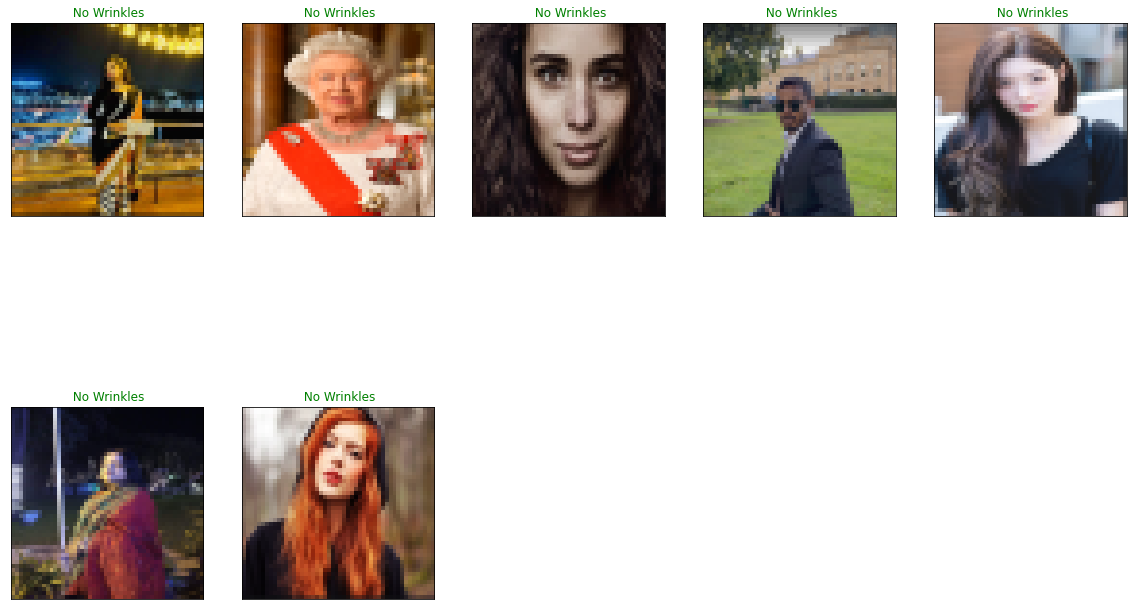

In [ ]:
file_Wrinkle = '/content/drive/MyDrive/VGG16WrinkleModel.h5'
model_Wrinkle = load_model(file_Wrinkle)
import pdb
y_hat_Wrinkle = model_Wrinkle.predict(test_images)

figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=7, replace= False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat_Wrinkle[index])
    # Set the title for each image
    ax.set_title("{}".format(class_namesWrinkle[predict_index]), 
                                  color=("green"))
    

In [ ]:
y_hat_Wrinkle

array([[0.5001245 , 0.49987555],
       [0.5001245 , 0.49987555],
       [0.5001245 , 0.49987555],
       [0.5001245 , 0.49987555],
       [0.5001245 , 0.49987555],
       [0.5001245 , 0.49987555],
       [0.5001245 , 0.49987555]], dtype=float32)

In [ ]:
Wrinkle_Class

[0, 0, 0, 0, 0, 0, 0]

# Predicting freakles with the new images.

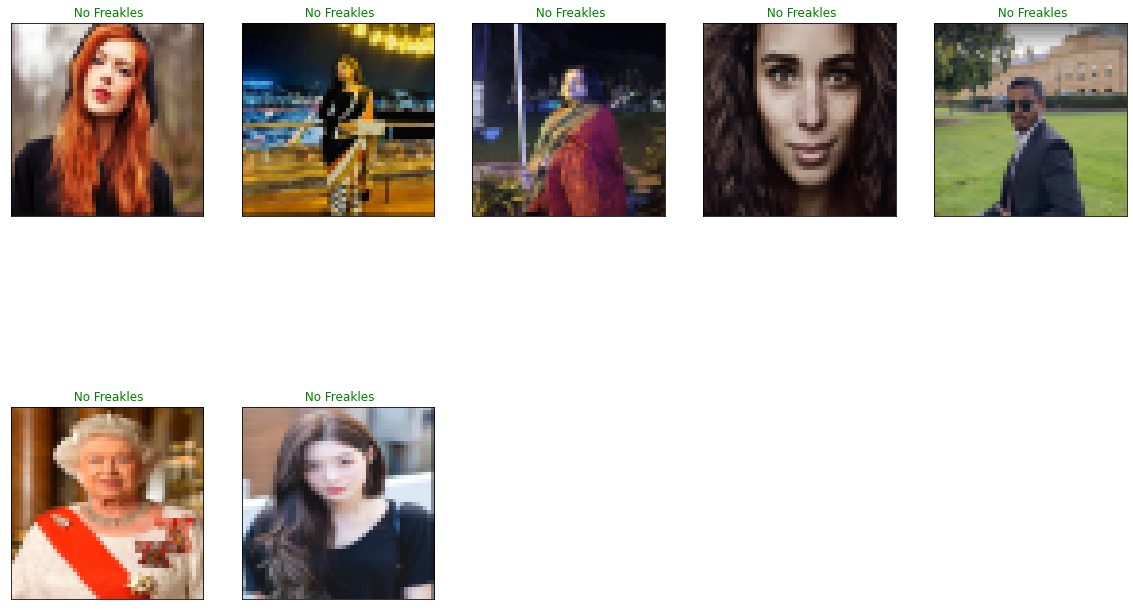

In [ ]:
file_Freakle = '/content/drive/MyDrive/VGG16FreakleModel.h5'
model_Freakle = load_model(file_Freakle)
import pdb
y_hat_Freakle = model_Freakle.predict(test_images)

figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=7, replace= False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat_Freakle[index])
    # Set the title for each image
    ax.set_title("{}".format(class_namesFreakles[predict_index]), 
                                  color=("green"))

# Predicting Glasses with the new images.

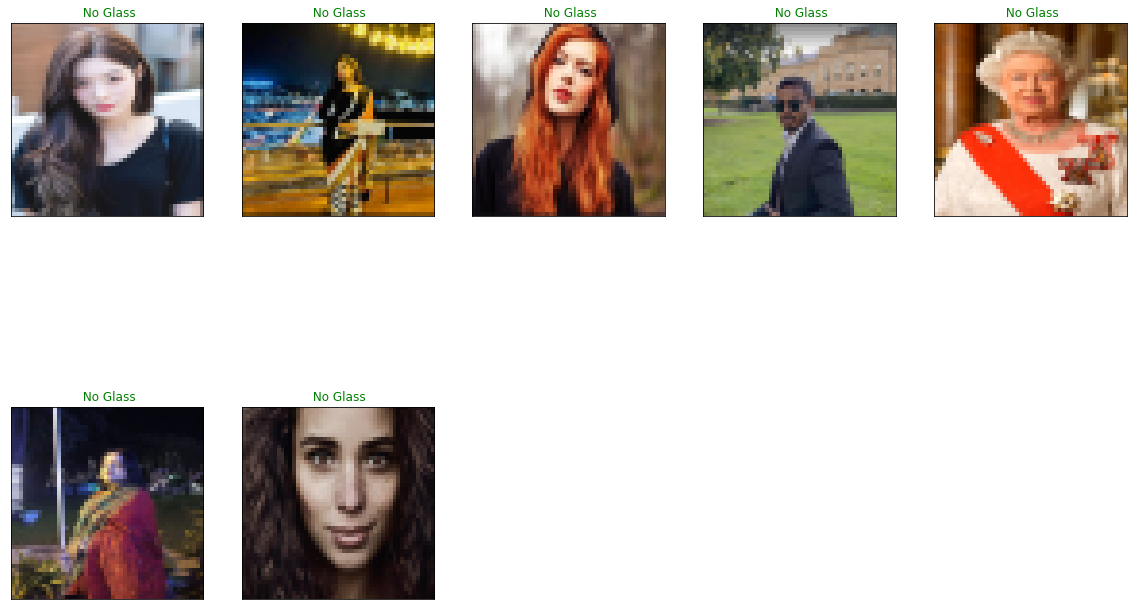

In [ ]:
file_Glass = '/content/drive/MyDrive/VGG16GlassModel.h5'
model_Glass = load_model(file_Glass)
import pdb
y_hat_Glass = model_Glass.predict(test_images)

figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=7, replace= False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat_Glass[index])
    # Set the title for each image
    ax.set_title("{}".format(class_namesGlasses[predict_index]), 
                                  color=("green"))

# Predicting Hair Color with the new images.

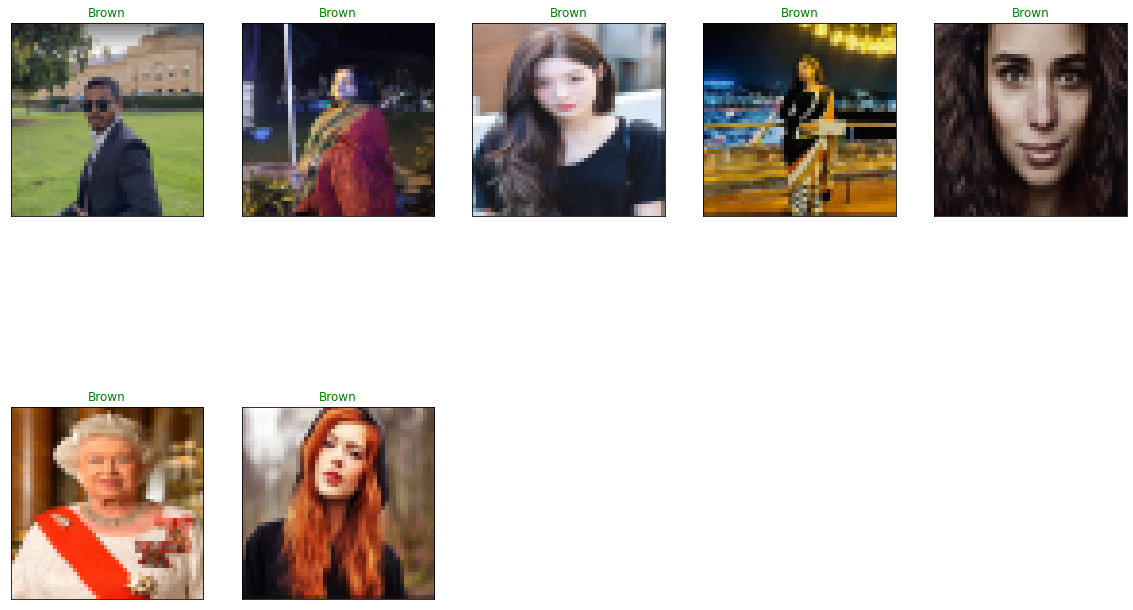

In [ ]:
file_HairColor = '/content/drive/MyDrive/VGG16HairColorModel.h5'
model_HairColor = load_model(file_HairColor)
import pdb
y_hat_HairColor = model_HairColor.predict(test_images)

figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=7, replace= False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat_HairColor[index])
    # Set the title for each image
    ax.set_title("{}".format(class_namesHairColor[predict_index]), 
                                  color=("green"))

# Predicting Hair Top with the new images.

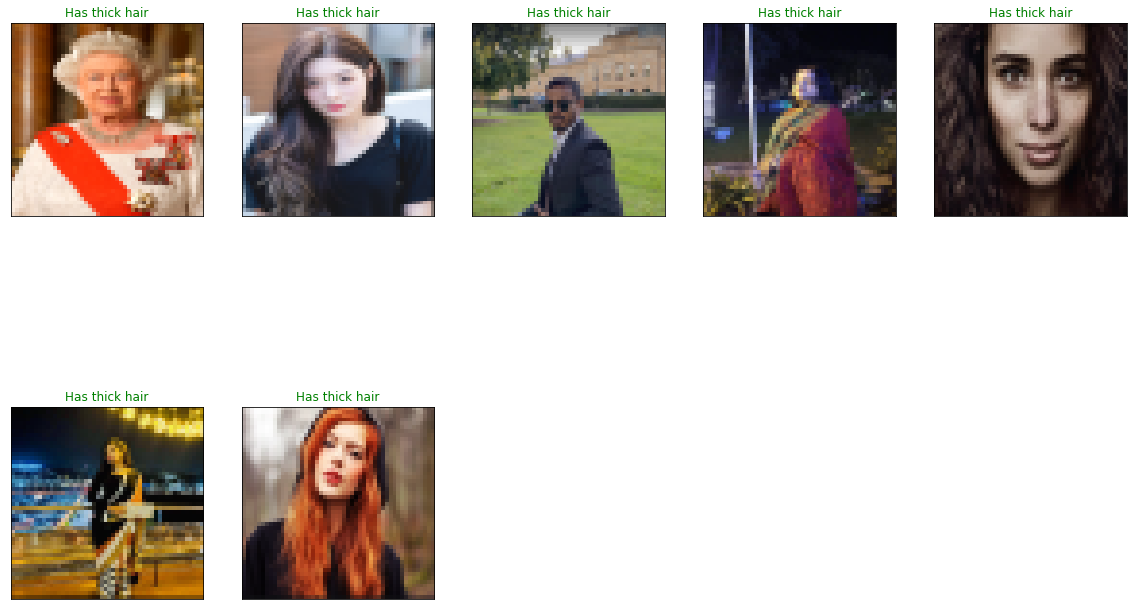

In [ ]:
file_HairTop = '/content/drive/MyDrive/VGG16HairTopModel.h5'
model_HairTop = load_model(file_HairTop)
import pdb
y_hat_HairTop = model_HairTop.predict(test_images)

figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=7, replace= False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat_HairTop[index])
    # Set the title for each image
    ax.set_title("{}".format(class_namesHairTop[predict_index]), 
                                  color=("green"))